#Part a

In [1]:
#Load exdata1 Data use np.loadtxt

import numpy as np
data = np.loadtxt('ex2data1.txt')

X = data[:, [0, 1]]
y = data[:, 2]

#Visualize the Data

Your plot should look like the figure below, exact markers and colors are not important as long as labels and legend are correct

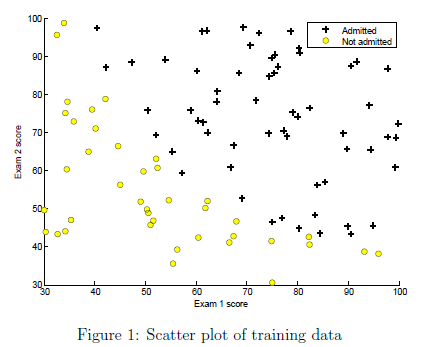

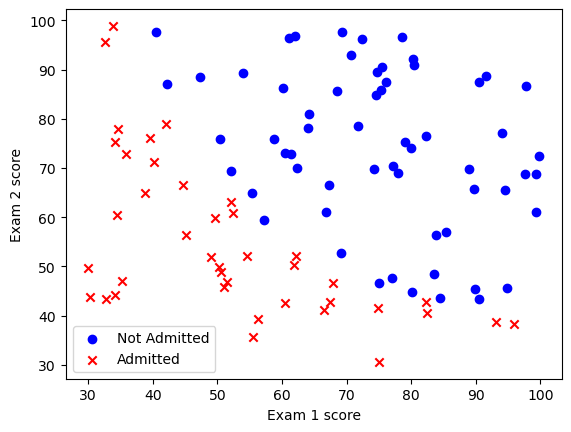

In [2]:
#Import relevant library to plot the data
from pylab import scatter, show, legend, xlabel, ylabel
pos = np.where(y == 1)
neg = np.where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()

#Sigmoid Function

Logistic Regression Hypothesis and Sigmoid function is given below and implementation is given in MATLAB, write the function for sigmoid below

\begin{align}
\ h_{\theta}(x) = g(\theta^Tx),.
\end{align}



\begin{align}
        g(z) = \frac{1}{1+e^{-z}}
\end{align}

In [3]:
#WRITE FUNCTION HERE

def sigmoid(X):
    '''Defining sigmoid function'''

    """
    Compute the sigmoid of X.
    
    Arguments:
    X -- A scalar or numpy array of any size.
    
    Returns:
    s -- sigmoid(X)
    """
    s = 1 / (1 + np.exp(-X))
    
    return s


In [4]:
#Provide input values to the sigmoid function below and run to check the function
sigmoid(0)

0.5

In [5]:
# Setup the data matrix appropriately
m, n = X.shape

# Add intercept term to X
X = np.concatenate((np.ones((m, 1)), X), axis=1)

# Initialize the fitting parameters
initial_theta = np.zeros((n + 1, 1))


#Cost Function and Gradient

The logistic regression cost function and gradient is given below.

\begin{align}
        J(\theta) =\frac{1}{m}\sum_{i=1}^m[-y^{(i)}\log(h_{\theta}(x^{(i)}))- (1 -y^{(i)})\log(1- h_{\theta}(x^{(i)}))
\end{align}

\begin{align}
    \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m( h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
\end{align}

In [6]:
#WRITE THE COST AND GRADIENT FUNCTION

 
def costFunction(theta, X, y): #computes cost given predicted and actual values
    """
    Compute cost and gradient for logistic regression
    
    Arguments:
    theta -- Parameters of the model
    X -- Input data
    y -- Output data
    
    Returns:
    J -- Cost of using theta as the parameter for logistic regression
    grad -- Gradient of the cost w.r.t. to the parameters
    """
    m = len(y)  # number of training examples
    
    # Initialize the cost J and gradient grad
    J = 0
    
    
    # Compute the hypothesis
    hypothesis = sigmoid(np.dot(X, theta))
    
    # Compute the cost J
    B = np.log(hypothesis)
    C = np.log(1 - hypothesis)
    D = B * y
    E = C * (1 - y)
    J = (-1 / m) * (np.sum(D) + np.sum(E))
    # Compute the gradient grad
    
    
    return J

def compute_grad(theta, X, y):
    grad = np.zeros_like(theta)
    hypothesis = sigmoid(np.dot(X, theta))
    for i in range(len(theta)):
        grad[i] = (1 / m) * np.sum((hypothesis - y) * X[:, i])
    return grad
    


In [7]:
X.shape

(100, 3)

In [8]:
A = np.reshape(initial_theta,(len(initial_theta),1))
A.shape

(3, 1)

Initialize the data

In [9]:
#Setup the data matrix appropriately
m,n = np.shape(X)

#Add intercept term to X
#HINT FIRST CREATE A Column Matrix of Ones and then use hstack to add it to X


#Initialize the fitting parameters
initial_theta = np.zeros((3 ,1))


Compute the gradient

In [10]:
#Verify with MATLAB's test values
cost = costFunction(initial_theta, X, y)
print('Cost at initial theta (zeros): %f\n', cost)

Cost at initial theta (zeros): %f
 69.31471805599453


In [11]:
grad = compute_grad(initial_theta, X, y)
print(grad)

[[  -10.        ]
 [-1200.92165893]
 [-1126.28422055]]


In [12]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costFunction, x0=initial_theta, fprime=compute_grad, args=(X, y))
theta = result[0]
costFunction(theta, X, y)


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602638610E-01   7.89087138E-01
    2    5  5.892425212362145E-01   7.39226693E+01
    3    7  4.227823982096096E-01   1.85265681E+01
    4    9  4.072926962188616E-01   1.68671131E+01
    5   11  3.818854845147196E-01   1.07735105E+01
    6   13  3.786234826012712E-01   2.31584928E+01
tnc: stepmx = 1000
    7   16  2.389268110370562E-01   3.00821942E+00
    8   18  2.047203892179570E-01   1.52227926E-01
    9   20  2.046713898303696E-01   6.62495266E-02
   10   22  2.035303162198429E-01   9.30780855E-04
tnc: fscale = 32.7775
   11   24  2.035293521109700E-01   8.07186921E-06
   12   26  2.035251112653928E-01   1.80217521E-04
   13   28  2.034984100231740E-01   5.02808212E-04
   14   30  2.034978374370250E-01   9.86204881E-06
   15   32  2.034977903278029E-01   3.76482614E-06
   16   34  2.034977384347597E-01   1.93482599E-05
   17   36  2.034977015987817E-01   2.43888535E-13


0.2034977015987817

In [13]:
def predict(initial_theta, X):
    """
    PREDICT Predict whether the label is 0 or 1 using learned logistic regression parameters theta.
    """
    # Number of training examples
    m = X.shape[0]
    
    # Initialize output predictions to zeros
    p = np.zeros((m, 1))
    
    # Loop over each example and compute its prediction
    for i in range(m):
        # If sigmoid(theta'*x) >= 0.5, predict 1, otherwise predict 0
        if sigmoid(np.dot(X[i, :], theta)) >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    
    return p


theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
